In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import pandas as pd  
import seaborn as sns  
from sklearn.model_selection import train_test_split   
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import r2_score, mean_squared_error  as mse  
import warnings  
warnings.filterwarnings("ignore")  
import matplotlib.pyplot as plt  
import numpy as np

In [7]:
z = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\Eicher_motors_Data_Jan-Nov24.csv")

In [11]:
z

,Datetime,Open,High,Low,Close,Volume
0,01/01/2024 09:15:00,"4,145.00","4,145.00","4,110.50","4,115.15",10520
1,01/01/2024 09:16:00,"4,110.00","4,122.50","4,106.20","4,116.90",5810
2,01/01/2024 09:17:00,"4,116.80","4,117.25","4,102.95","4,115.80",5664
3,01/01/2024 09:18:00,"4,115.80","4,120.00","4,102.00","4,110.95",7581
4,01/01/2024 09:19:00,"4,110.90","4,116.35","4,103.95","4,106.85",2589
...,...,...,...,...,...,...
84634,29/11/2024 15:25:00,"4,835.00","4,835.00","4,834.95","4,834.95",1473
84635,29/11/2024 15:26:00,"4,835.00","4,835.00","4,834.95","4,835.00",4500
84636,29/11/2024 15:27:00,"4,835.00","4,835.00","4,834.95","4,834.95",2501
84637,29/11/2024 15:28:00,"4,834.95","4,835.00","4,832.15","4,833.15",4959


In [13]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84639 entries, 0 to 84638
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  84639 non-null  object
 1   Open      84639 non-null  object
 2   High      84639 non-null  object
 3   Low       84639 non-null  object
 4   Close     84639 non-null  object
 5   Volume    84639 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.9+ MB


In [15]:
z.isnull().sum()

Datetime    0
Open        0
High        0
Low         0
Close       0
Volume      0
dtype: int64

In [17]:
z["Open"].value_counts()

Open
4,900.00    122
4,800.00    108
3,900.00    102
4,600.00    102
4,870.00     98
           ... 
4,291.40      1
4,290.95      1
4,290.05      1
4,288.05      1
4,817.80      1
Name: count, Length: 19884, dtype: int64

In [19]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84639 entries, 0 to 84638
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  84639 non-null  object
 1   Open      84639 non-null  object
 2   High      84639 non-null  object
 3   Low       84639 non-null  object
 4   Close     84639 non-null  object
 5   Volume    84639 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.9+ MB


In [21]:
for i in z:
    if(z[i].dtype == "object") and ( i != "Datetime"):
        z[i] = z[i].apply(lambda x : x.replace(",", ""))
        z[i] = z[i].astype(float)

In [23]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84639 entries, 0 to 84638
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  84639 non-null  object 
 1   Open      84639 non-null  float64
 2   High      84639 non-null  float64
 3   Low       84639 non-null  float64
 4   Close     84639 non-null  float64
 5   Volume    84639 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.9+ MB


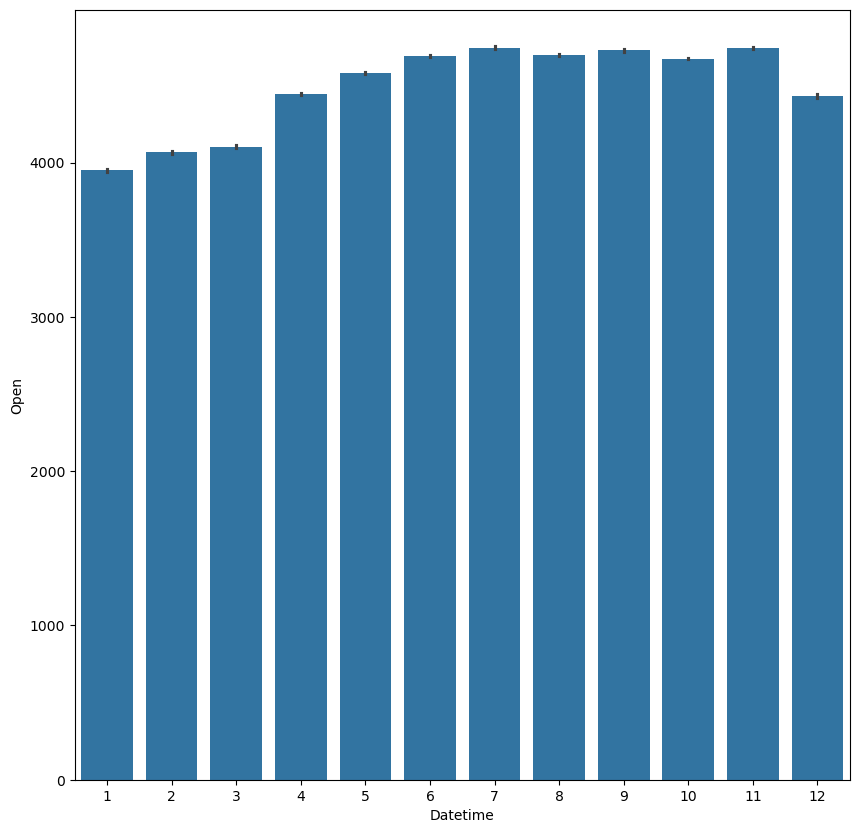

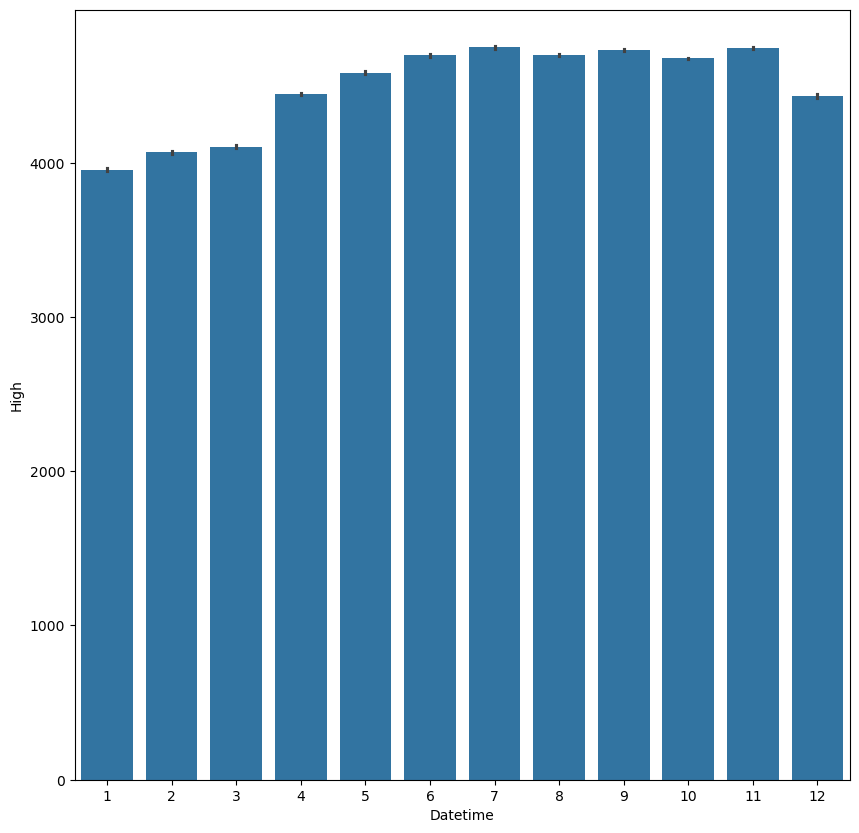

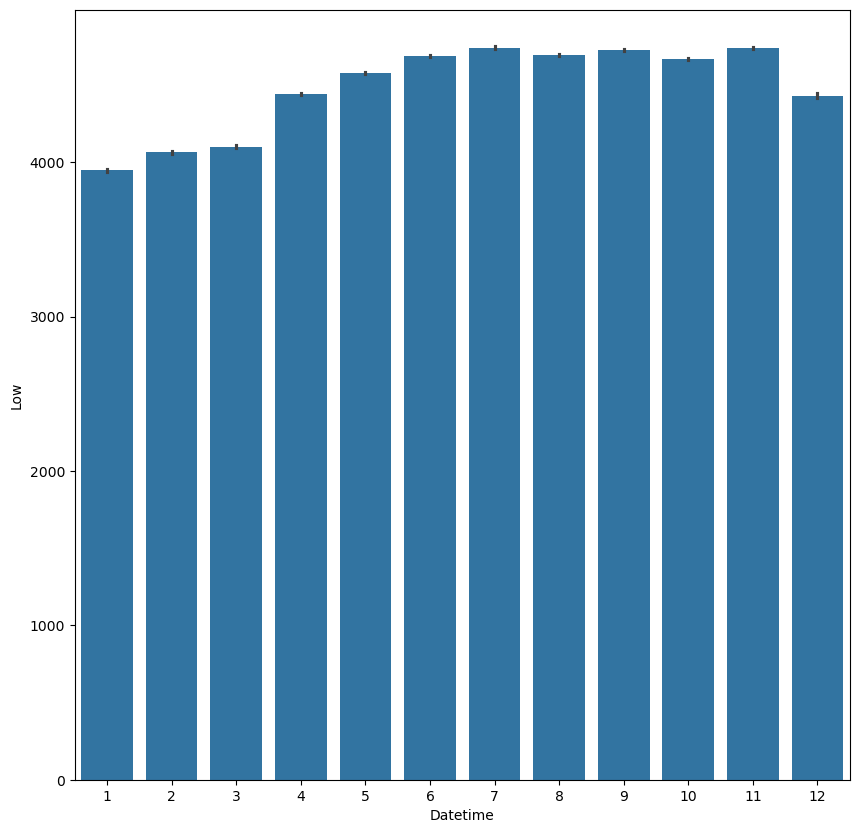

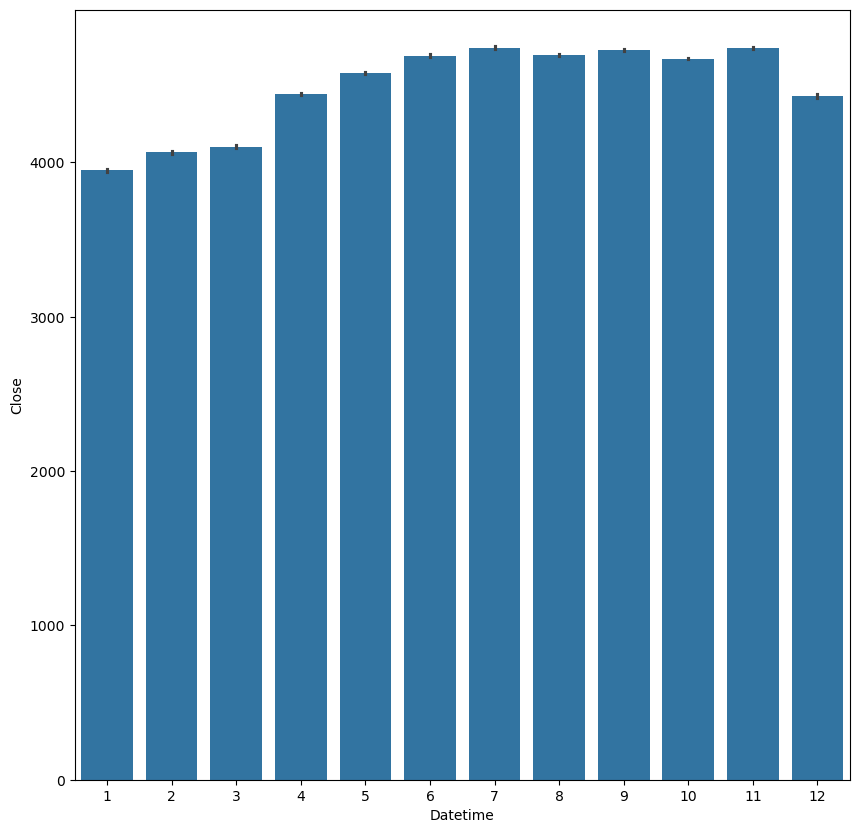

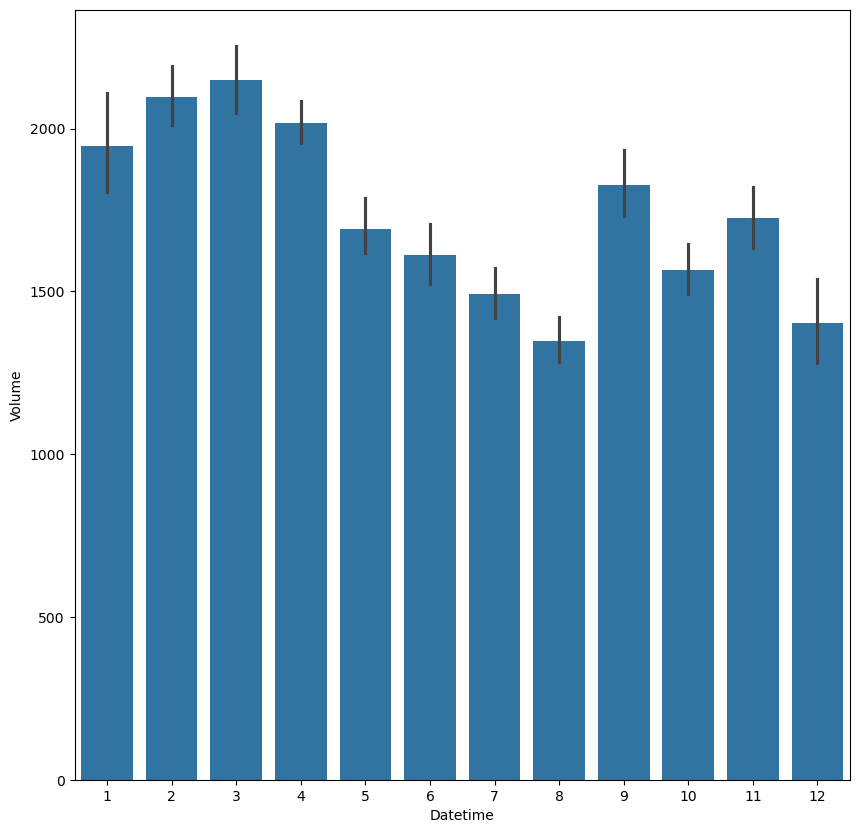

In [25]:
for i in z: 
    if(z[i].dtype != "object"): 
        plt.figure(figsize = (10, 10)) 
        sns.barplot(x = pd.DatetimeIndex(z["Datetime"]).month, y = z[i], data = z)

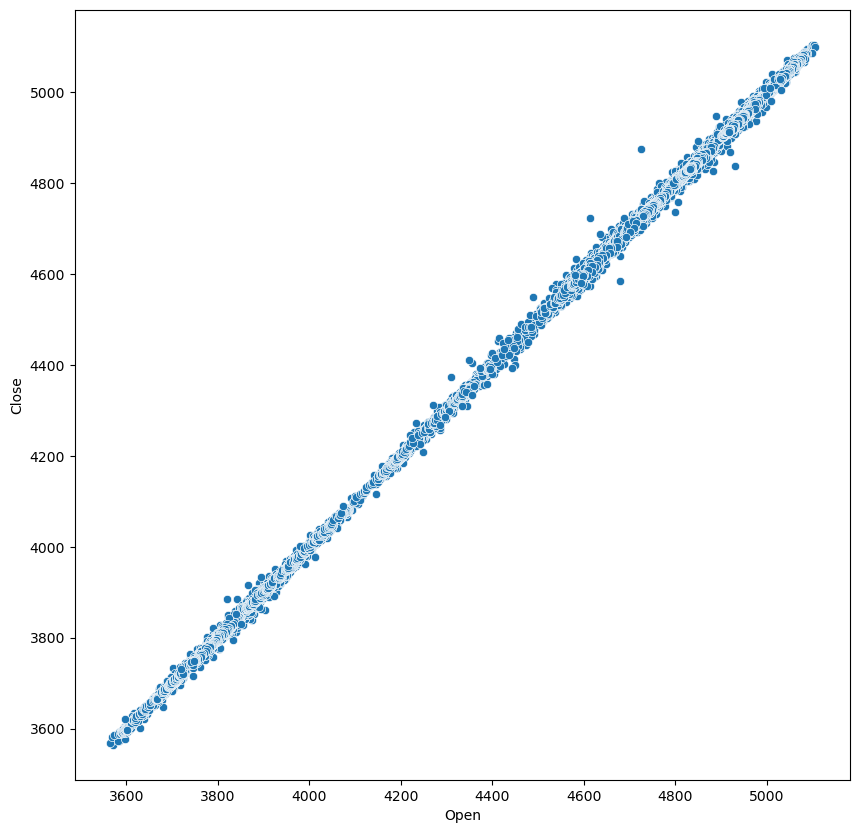

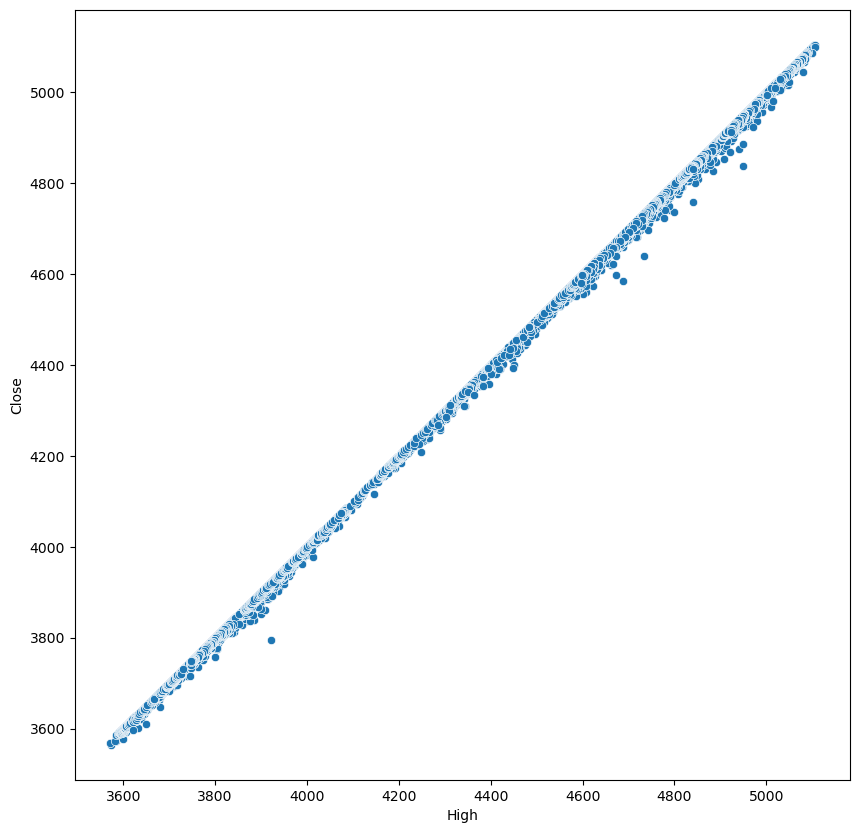

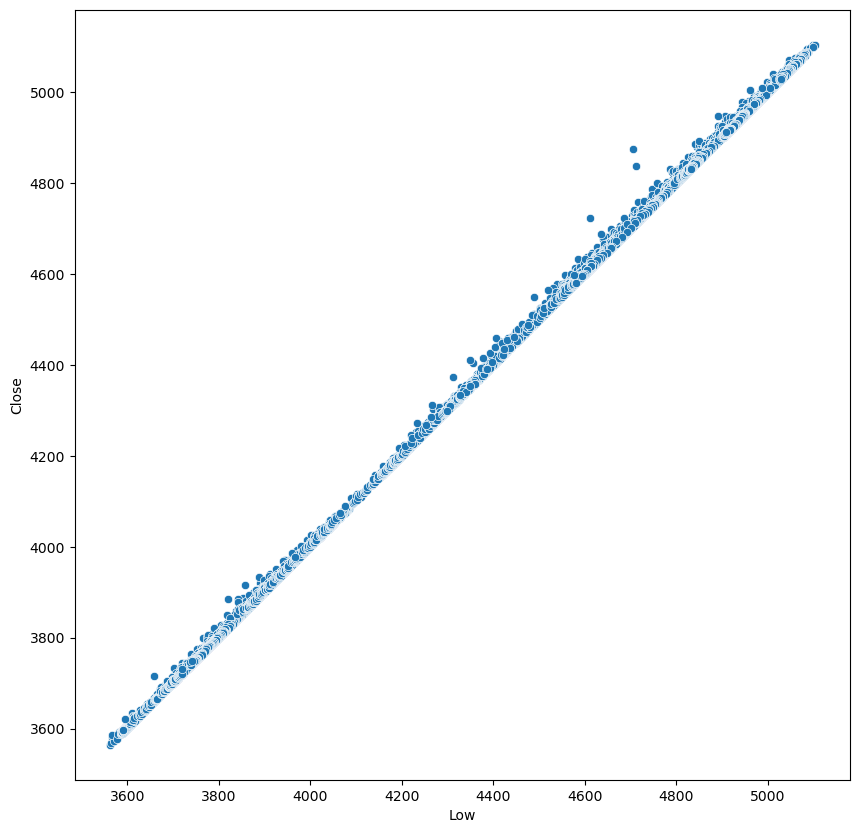

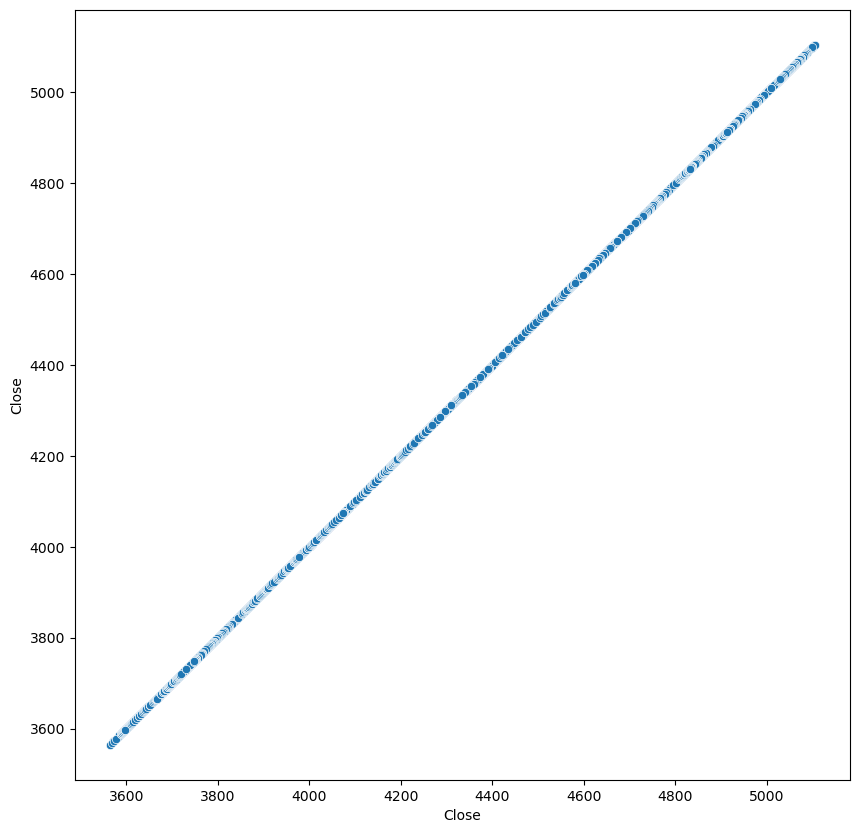

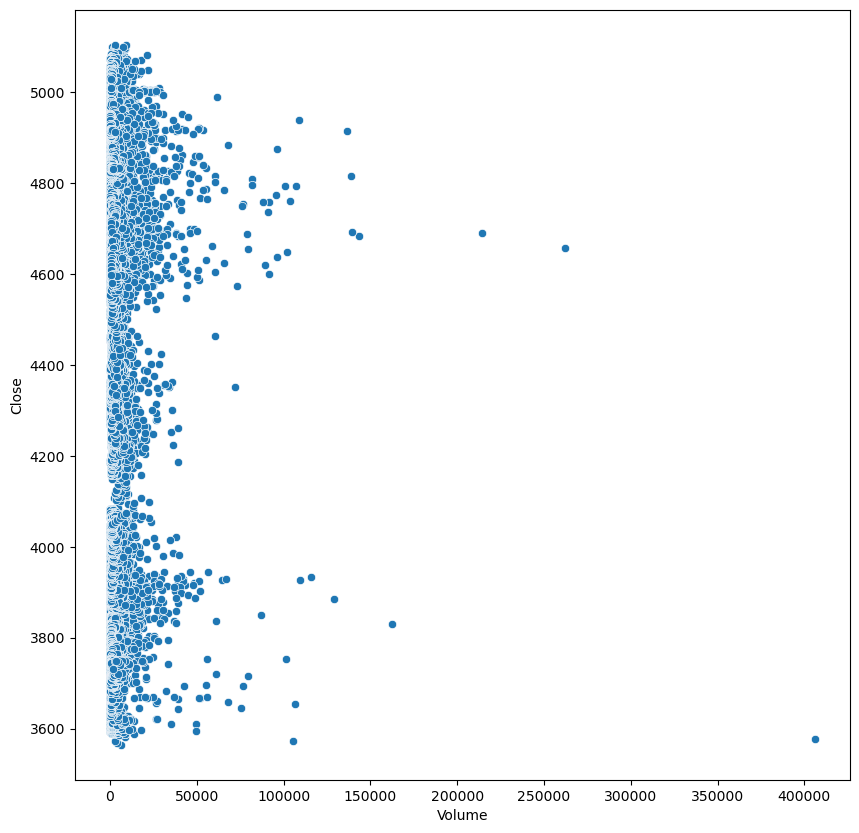

In [26]:
for i in z: 
    if(z[i].dtype != "object"): 
        plt.figure(figsize = (10, 10)) 
        sns.scatterplot(x = z[i], y = z["Close"], data = z)

In [27]:
b = z.copy()  
for i in b: 
    if(b[i].dtype == "object"): 
        b.drop([i], axis = 1, inplace = True)
b

,Open,High,Low,Close,Volume
0,4145.00,4145.00,4110.50,4115.15,10520
1,4110.00,4122.50,4106.20,4116.90,5810
2,4116.80,4117.25,4102.95,4115.80,5664
3,4115.80,4120.00,4102.00,4110.95,7581
4,4110.90,4116.35,4103.95,4106.85,2589
...,...,...,...,...,...
84634,4835.00,4835.00,4834.95,4834.95,1473
84635,4835.00,4835.00,4834.95,4835.00,4500
84636,4835.00,4835.00,4834.95,4834.95,2501
84637,4834.95,4835.00,4832.15,4833.15,4959


In [28]:
b.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999974,0.999975,0.999961,-0.023625
High,0.999974,1.000000,0.999956,0.999977,-0.021814
Low,0.999975,0.999956,1.000000,0.999977,-0.025224
Close,0.999961,0.999977,0.999977,1.000000,-0.023433
Volume,-0.023625,-0.021814,-0.025224,-0.023433,1.000000


In [29]:
b.corr()["Close"].sort_values(ascending = False).head(2)

Close    1.000000
High     0.999977
Name: Close, dtype: float64

In [31]:
X = z["High"]
Y = z["Close"]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [41]:
y_train = np.array(y_train).reshape(-1, 1) 
y_test = np.array(y_test).reshape(-1, 1)

In [43]:
n = RandomForestRegressor() 
n.fit(x_train, y_train)

RandomForestRegressor()

In [44]:
y_predict_train = n.predict(x_train)  
r2_train = r2_score(y_true = y_train, y_pred = y_predict_train)

In [47]:
round(r2_train, 2)*100

100.0

In [49]:
y_predict_test = n.predict(x_test)  
r2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

In [51]:
round(r2_test, 2)*100

100.0

In [53]:
mse_train = mse(y_true = y_train, y_pred = y_predict_train) 
mse_train

6.045057294519364

In [55]:
rmse_train = np.sqrt(mse_train)  
rmse_train

2.458669822184216

In [57]:
mse_test = mse(y_true = y_test, y_pred = y_predict_test) 
mse_test

11.217767048362512

In [59]:
rmse_test =  np.sqrt(mse_test)
rmse_test

3.349293514812118